# WeatherPy
----

Observable trends #1
The maximum temperature of the sampled cities increases as it approaches lower latitude. The highest values take place approximately between 15 and 35 degree in the northern hemisphere.

Observable trends #2
Among the sampled cities, the humidity and wind speed vary across the latitude, in other words, it seems these two weather factors are not relevant to the latitudes.

Observable trends #3
A lot of the sampled cities from the equator to the 20 degree north have high cloudiness. The low cloudiness occurs -35-0 south and 20-60 degree north from the equator. It is not necessarily to say the high cloudiness correlates to the low latitude, since quite a few sampled cities in the high latitude (-35 to -40 degree south and 40 degree north) also have high cloudiness.

Other thoughts:
It is doubtful the solid conclusions could be draw based on the weather factors we use during a day from the sampled cities. I would rather use the annual mean values to study whether they are related to the latitudes.

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
currentDT = datetime.now()

import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initial values for processing
count = 1 
sets  = 1

# Set up lists to hold reponse info
City=[]
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lon = []
Max_temp = [] 
Wind = []

# Create settings dictionary with information we're interested in
settings = {"units": "Imperial", "appid": api_key}

print(f'Beginning Data Retrieval \n---------------------------')
for city in cities:
    try:
        current_weather = owm.get_current(city, **settings)
        print(f"Processing Record {count} of Set {sets} | {city}" )
        City.append(city)
        Cloudiness.append( current_weather["clouds"]["all"]) 
        Country.append( current_weather["sys"]["country"])        
        Date.append( current_weather["dt"])
        Humidity.append( current_weather["main"]["humidity"])
        Lat.append( current_weather["coord"]["lat"])
        Lon.append( current_weather["coord"]["lon"]) 
        Max_temp.append( current_weather["main"]["temp_max"])
        Wind.append( current_weather["wind"]["speed"])
        count = count+1
    except Exception: 
        print("City not found. Skipping...")
    if count == 51:
        count = 0 
        sets = sets+1

print("-----------------------\nData Retrieval Complete\n-----------------------")

Beginning Data Retrieval 
---------------------------
Processing Record 1 of Set 1 | lachute
Processing Record 2 of Set 1 | san cristobal
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 5 of Set 1 | ixtapa
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | tual
Processing Record 8 of Set 1 | hami
Processing Record 9 of Set 1 | thaba-tseka
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | tiznit
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | barrow
City not found. Skipping...
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | lakes entrance
Processing Record 20 of Set 1 | laranjeiras do sul
Processing Record 21 of Set 1 | torbay
Processing Record 22 of

Processing Record 33 of Set 4 | esperance
Processing Record 34 of Set 4 | ponta delgada
Processing Record 35 of Set 4 | marzuq
Processing Record 36 of Set 4 | namibe
Processing Record 37 of Set 4 | soyo
Processing Record 38 of Set 4 | peterhead
Processing Record 39 of Set 4 | chalons-en-champagne
City not found. Skipping...
Processing Record 40 of Set 4 | zhigansk
Processing Record 41 of Set 4 | srednekolymsk
Processing Record 42 of Set 4 | sindor
Processing Record 43 of Set 4 | starogard gdanski
City not found. Skipping...
Processing Record 44 of Set 4 | samarai
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | ambilobe
Processing Record 47 of Set 4 | avera
Processing Record 48 of Set 4 | ypsonas
Processing Record 49 of Set 4 | san quintin
Processing Record 50 of Set 4 | almaznyy
Processing Record 0 of Set 5 | talcahuano
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | zheleznodorozhnyy
Proc

Processing Record 11 of Set 8 | sitka
Processing Record 12 of Set 8 | sorland
Processing Record 13 of Set 8 | mehamn
Processing Record 14 of Set 8 | tezu
Processing Record 15 of Set 8 | rafaela
Processing Record 16 of Set 8 | finale ligure
Processing Record 17 of Set 8 | mar del plata
Processing Record 18 of Set 8 | nemuro
Processing Record 19 of Set 8 | najran
Processing Record 20 of Set 8 | swidwin
Processing Record 21 of Set 8 | lardos
Processing Record 22 of Set 8 | nchelenge
Processing Record 23 of Set 8 | talnakh
City not found. Skipping...
Processing Record 24 of Set 8 | santa rosa
Processing Record 25 of Set 8 | sinjar
Processing Record 26 of Set 8 | kholm
Processing Record 27 of Set 8 | emerald
Processing Record 28 of Set 8 | cleethorpes
Processing Record 29 of Set 8 | sakaiminato
Processing Record 30 of Set 8 | santa cruz
Processing Record 31 of Set 8 | ostrovnoy
Processing Record 32 of Set 8 | pathanamthitta
Processing Record 33 of Set 8 | iqaluit
Processing Record 34 of Set

Processing Record 45 of Set 11 | mackay
Processing Record 46 of Set 11 | san carlos de bariloche
City not found. Skipping...
Processing Record 47 of Set 11 | pilar
Processing Record 48 of Set 11 | sohag
Processing Record 49 of Set 11 | tucurui
-----------------------
Data Retrieval Complete
-----------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Dataframe for storing city data
WeatherPy_df = pd.DataFrame({"City":City,
                             "Country":Country,
                             "Lat":Lat, "Lng":Lon,
                             "Date (UTC)":Date,
                             "Cloudiness (%)":Cloudiness,
                             "Humidity (%)":Humidity,    
                             "Max Temp (F)":Max_temp,
                             "Wind Speed (mph)":Wind
                            })

# Export the city data into a .csv.
WeatherPy_df.to_csv("WeatherPy_cities.csv", encoding='utf-8', index=True)

In [7]:
WeatherPy_df.count()

City                559
Country             559
Lat                 559
Lng                 559
Date (UTC)          559
Cloudiness (%)      559
Humidity (%)        559
Max Temp (F)        559
Wind Speed (mph)    559
dtype: int64

In [8]:
WeatherPy_df.head()

,City,Country,Lat,Lng,Date (UTC),Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,lachute,CA,45.66,-74.34,1561387370,75,35,75.00,3.36
1,san cristobal,EC,-0.39,-78.55,1561387370,91,98,48.00,4.68
2,cherskiy,RU,68.75,161.30,1561387370,19,43,60.71,6.64
3,ushuaia,AR,-54.81,-68.31,1561387370,40,80,35.60,14.99
4,ixtapa,MX,20.71,-105.21,1561387371,5,73,82.00,6.08


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

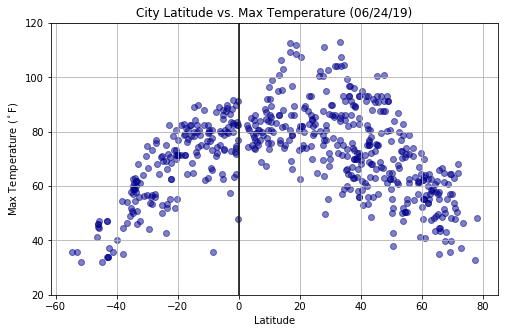

In [12]:
plt.figure(figsize=(8,5))

plt.axvline(x=0, c='k', lw=1.5)
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp (F)"], color='darkblue', alpha=0.5)

plt.ylim(20, 120)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ($^\circ$F)")
plt.title("City Latitude vs. Max Temperature ("+currentDT.strftime("%m/%d/%y")+")")
plt.grid()
plt.savefig("Figures/Lat_vs_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

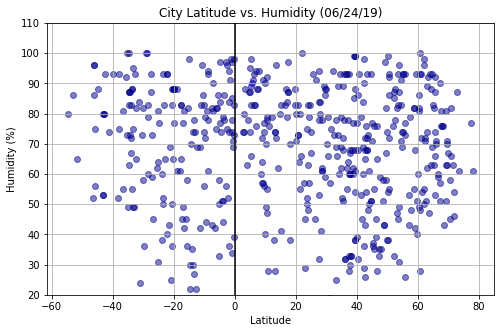

In [14]:
plt.figure(figsize=(8,5))

plt.axvline(x=0, c='k', lw=1.5)
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity (%)"], color='darkblue', alpha=0.5)

plt.ylim(20, 110)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity ("+currentDT.strftime("%m/%d/%y")+")")
plt.grid()
plt.savefig("Figures/Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

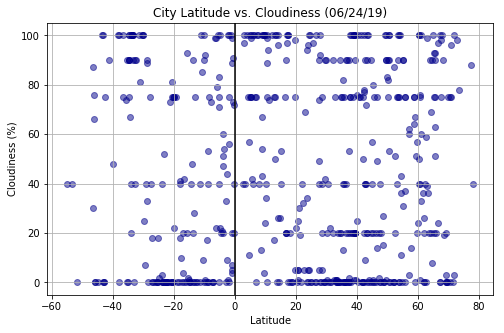

In [15]:
plt.figure(figsize=(8,5))

plt.axvline(x=0, c='k', lw=1.5)
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness (%)"], color='darkblue', alpha=0.5)

plt.ylim(-5, 105)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness ("+currentDT.strftime("%m/%d/%y")+")")
plt.grid()
plt.savefig("Figures/Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

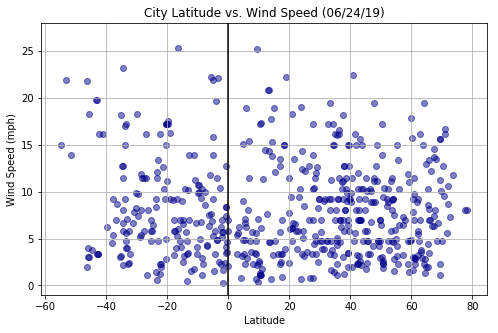

In [18]:
plt.figure(figsize=(8,5))

plt.axvline(x=0, c='k', lw=1.5)
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed (mph)"], color='darkblue', alpha=0.5)

plt.ylim(-1, 28)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed ("+currentDT.strftime("%m/%d/%y")+")")
plt.grid()
plt.savefig("Figures/Lat_vs_WindSpeed.png")
plt.show()